# **Objectives of this Project**
1. How many facilities are operating 24hrs and 7 days a week by LGA?
2. Distribution of facilities staff by types.
3. What is the count of health workers by gender?
4. Comparison of all Facility staff and health workers.
5. What is the distribution of facilities by LGA?
6. Comparison of cadres of Health Workers by types.
7. Count of available and present of Health Workers.
8. Types of referal by facilities.
9. What are the top five reasons for absenteesm?
10. Name of facilities stocking vaccines and  have functional refrigerator.


# **Importing required libraries**

In [ ]:
from google.colab import userdata
import toml
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# **Creating a config file**

In [ ]:
data = {
    'central': {
        'base_url':userdata.get('BASE_URL'),
        'username':userdata.get('USERNAME'),
        'password':userdata.get('PASSWORD'),
        'default_project_id':6
    }
}

file_path = '/content/sample_data/config.toml'
with open(file_path, 'w') as file:
    toml.dump(data, file)

# Loading of forms

In [ ]:
import pandas as pd
!pip install pyodk
from pyodk import Client

client = Client(config_path='/content/sample_data/config.toml')
client.open()


#client forms
forms =  client.forms.list()
# submisions = client.submissions.list(form_id='')
# form_data = client.submisions.get_table(form_id='', submission_id='')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninstalling pydantic-2.10.3:
      Successfully uninstalled pydantic-2.10.3
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.4.0
    Uninstalling charset-normalizer-3.4.0:
      Successfully uninstalled charset-normalizer-3.4.0
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3

ERROR:pyodk._utils.config:Could not read file at: /root/.pyodk_cache.toml. FileNotFoundError(2, 'No such file or directory').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyodk/_utils/config.py", line 77, in read_toml
    with open(path, "r") as f:
FileNotFoundError: [Errno 2] No such file or directory: '/root/.pyodk_cache.toml'


In [ ]:
submisions = client.submissions.list(form_id='longitudinal_assessment_baseline_form')  # accessing forms

form_data = client.submissions.get_table(form_id='longitudinal_assessment_baseline_form', project_id='6')['value'] #getting the specific form and

# **Converting Data to a DataFrame**

In [ ]:
pd.set_option('display.max_columns', None) #displaying all columns of dataset
df = pd.json_normalize(form_data) # converting to pandas dataframe
df.head()

,start,end,today,deviceid,phonenumber,__id,start_geopoint.type,start_geopoint.coordinates,start_geopoint.properties.accuracy,facility_details.lga,facility_details.ward,facility_details.facility,facility_details.fellow,facility_details.facility_file,facility_details.facility_number,facility_details.operation_hours,facility_details.days_in_week_routinely_open,facility_details.service_provider_name,facility_details.service_provider_cadre,facility_details.other_service_provider_cadre,facility_details.service_provider_position,facility_details.staffs_number,facility_details.permanent_staffs_number,facility_details.adhoc_a_staffs_number,facility_details.adhoc_b_staffs_number,facility_details.volunteer_staffs_number,facility_details.referral_service,facility_details.referral_type,facility_details.functional_community_structures,facility_details.functional_community_structures_type,facility_details.other_functional_community_structures_type,facility_details.cces_vaccines_storage,facility_details.cces_types_available,facility_details.other_cces_types_available,facility_details.solar_refrigerators_and_freezers_functionality,facility_details.refrigerators_functionality,facility_details.ice_packs_functionality,facility_details.cold_boxes_functionality,facility_details.giostyle_functionality,facility_details.rush_functionality,facility_details.temperature_monitoring_devices_functionality,facility_details.other_cces_functionlity,facility_details.hcw_received_training_last_two_three_year,facility_details.hcw_training_received,facility_details.hcw_training_received_other,facility_details.facility_services_provided,facility_details.other_facility_services_provided,facility_details.service_delivery_dedicated_day,facility_details.health_education_service_day,facility_details.immunization_service_day,facility_details.nutrition_service_day,facility_details.hiv_service_day,facility_details.pmtct_service_day,facility_details.antenatal_services_service_day,facility_details.post_natal_care_service_day,facility_details.imci_service_day,facility_details.malaria_service_day,facility_details.labour_and_delivery_service_day,facility_details.family_planning_service_day,facility_details.tb_service_day,facility_details.cervical_cancer_service_day,facility_details.other_service_day,hrh.roster.generated_note_name_68,hrh.roster.staff_roster,hrh.roster.staff_roster_develop_freq,hrh.roster.staff_roster_update_freq,hrh.roster.staff_roster_update_this_week,hrh.roster.permanent_staff_on_roster,hrh.roster.adhoc_a_staff_on_roster,hrh.roster.adhoc_b_staff_on_roster,hrh.roster.volunteer_staff_on_roster,hrh.healt_workers.generated_note_name_79,hrh.healt_workers.number_health_workers,hrh.healt_workers.number_health_workers_male,hrh.healt_workers.number_health_workers_female,hrh.healt_workers.number_health_workers_permanent,hrh.healt_workers.number_health_workers_adhoc_a,hrh.healt_workers.number_health_workers_adhoc_b,hrh.healt_workers.number_health_workers_volunteer,hrh.medical_officers.number_medical_officer_available,hrh.medical_officers.number_permanent_medical_officer_available,hrh.medical_officers.number_adhoc_a_medical_officer_available,hrh.medical_officers.number_adhoc_b_medical_officer_available,hrh.medical_officers.number_volunteer_medical_officer_available,hrh.medical_officers.number_medical_officer_present,hrh.medical_officers.number_permanent_medical_officer_present,hrh.medical_officers.medical_officers_absence_reason,hrh.medical_officers.medical_officers_absence_main_reason,hrh.nurses_midwives.number_nurses_midwives_available,hrh.nurses_midwives.number_permanent_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_a_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_b_nurses_midwives_available,hrh.nurses_midwives.number_volunteer_nurses_midwives_available,hrh.nurses_midwives.number_nurses_midwives_present,hrh.nurses_midwives.number_permanent_nurses_midwives_present,hrh.nurses_midwives.nurses_midwives_absence_reason,hrh.nurses_midwives.nurses_midw

# **Descriptive statistics**

In [ ]:
df.columns #showing all columns

Index(['start', 'end', 'today', 'deviceid', 'phonenumber', '__id',
       'start_geopoint.type', 'start_geopoint.coordinates',
       'start_geopoint.properties.accuracy', 'facility_details.lga',
       ...
       '__system.submitterId', '__system.submitterName',
       '__system.attachmentsPresent', '__system.attachmentsExpected',
       '__system.status', '__system.reviewState', '__system.deviceId',
       '__system.edits', '__system.formVersion', 'start_geopoint'],
      dtype='object', length=376)

In [ ]:
df.describe() #descriptive statistics of numerical columns

,start_geopoint.properties.accuracy,facility_details.operation_hours,facility_details.days_in_week_routinely_open,facility_details.staffs_number,facility_details.permanent_staffs_number,facility_details.adhoc_a_staffs_number,facility_details.adhoc_b_staffs_number,facility_details.volunteer_staffs_number,hrh.roster.permanent_staff_on_roster,hrh.roster.adhoc_a_staff_on_roster,hrh.roster.adhoc_b_staff_on_roster,hrh.roster.volunteer_staff_on_roster,hrh.healt_workers.number_health_workers,hrh.healt_workers.number_health_workers_male,hrh.healt_workers.number_health_workers_female,hrh.healt_workers.number_health_workers_permanent,hrh.healt_workers.number_health_workers_adhoc_a,hrh.healt_workers.number_health_workers_adhoc_b,hrh.healt_workers.number_health_workers_volunteer,hrh.medical_officers.number_medical_officer_available,hrh.medical_officers.number_permanent_medical_officer_available,hrh.medical_officers.number_adhoc_a_medical_officer_available,hrh.medical_officers.number_adhoc_b_medical_officer_available,hrh.medical_officers.number_medical_officer_present,hrh.nurses_midwives.number_nurses_midwives_available,hrh.nurses_midwives.number_permanent_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_a_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_b_nurses_midwives_available,hrh.nurses_midwives.number_volunteer_nurses_midwives_available,hrh.nurses_midwives.number_nurses_midwives_present,hrh.nurses_midwives.number_permanent_nurses_midwives_present,hrh.cho.number_cho_available,hrh.cho.number_permanent_cho_available,hrh.cho.number_adhoc_a_cho_available,hrh.cho.number_adhoc_b_cho_available,hrh.cho.number_volunteer_cho_available,hrh.cho.number_cho_present,hrh.cho.number_permanent_cho_present,hrh.schew.number_schew_available,hrh.schew.number_permanent_schew_available,hrh.schew.number_adhoc_a_schew_available,hrh.schew.number_adhoc_b_schew_available,hrh.schew.number_volunteer_schew_available,hrh.schew.number_schew_present,hrh.schew.number_permanent_schew_present,hrh.jchew.number_jchew_available,hrh.jchew.number_permanent_jchew_available,hrh.jchew.number_adhoc_a_jchew_available,hrh.jchew.number_adhoc_b_jchew_available,hrh.jchew.number_volunteer_jchew_available,hrh.jchew.number_jchew_present,hrh.jchew.number_permanent_jchew_present,hrh.medical_lab_technician.number_mlt_available,hrh.medical_lab_technician.number_permanent_mlt_available,hrh.medical_lab_technician.number_adhoc_a_mlt_available,hrh.medical_lab_technician.number_adhoc_b_mlt_available,hrh.medical_lab_technician.number_volunteer_mlt_available,hrh.medical_lab_technician.number_mlt_present,hrh.medical_lab_technician.number_permanent_mlt_present,hrh.medical_record_officer.number_medical_record_officer_available,hrh.medical_record_officer.number_permanent_medical_record_officer_available,hrh.medical_record_officer.number_adhoc_a_medical_record_officer_available,hrh.medical_record_officer.number_adhoc_b_medical_record_officer_available,hrh.medical_record_officer.number_volunteer_medical_record_officer_available,hrh.medical_record_officer.number_medical_record_officer_present,hrh.medical_record_officer.number_permanent_medical_record_officer_present,hrh.pharmacy_technicians.number_pharmacy_technicians_available,hrh.pharmacy_technicians.number_permanent_pharmacy_technicians_available,hrh.pharmacy_technicians.number_adhoc_a_pharmacy_technicians_available,hrh.pharmacy_technicians.number_adhoc_b_pharmacy_technicians_available,hrh.pharmacy_technicians.number_volunteer_pharmacy_technicians_available,hrh.pharmacy_technicians.number_pharmacy_technicians_present,hrh.pharmacy_technicians.number_permanent_pharmacy_technicians_present,hrh.environmental_officer.number_environmental_officer_available,hrh.environmental_officer.number_permanent_environmental_officer_available,hrh.environmental_officer.number_adhoc_a_environmental_officer_available,hrh.environmental_officer.number_adhoc_b_environmental_officer_available,hrh.environmental_officer.number_volunteer_environmental_officer_av

In [ ]:
df.info()  #checking info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Columns: 376 entries, start to start_geopoint
dtypes: float64(127), int64(20), object(229)
memory usage: 267.4+ KB


In [ ]:
df.shape  #shape of data

(91, 376)

In [ ]:
#dropping some columns
df=df.drop(columns = ['start', 'end', 'today', 'deviceid', 'phonenumber', '__id',
       'start_geopoint.type', 'start_geopoint.coordinates',
       'start_geopoint.properties.accuracy'], axis=1)

In [ ]:
df

,facility_details.lga,facility_details.ward,facility_details.facility,facility_details.fellow,facility_details.facility_file,facility_details.facility_number,facility_details.operation_hours,facility_details.days_in_week_routinely_open,facility_details.service_provider_name,facility_details.service_provider_cadre,facility_details.other_service_provider_cadre,facility_details.service_provider_position,facility_details.staffs_number,facility_details.permanent_staffs_number,facility_details.adhoc_a_staffs_number,facility_details.adhoc_b_staffs_number,facility_details.volunteer_staffs_number,facility_details.referral_service,facility_details.referral_type,facility_details.functional_community_structures,facility_details.functional_community_structures_type,facility_details.other_functional_community_structures_type,facility_details.cces_vaccines_storage,facility_details.cces_types_available,facility_details.other_cces_types_available,facility_details.solar_refrigerators_and_freezers_functionality,facility_details.refrigerators_functionality,facility_details.ice_packs_functionality,facility_details.cold_boxes_functionality,facility_details.giostyle_functionality,facility_details.rush_functionality,facility_details.temperature_monitoring_devices_functionality,facility_details.other_cces_functionlity,facility_details.hcw_received_training_last_two_three_year,facility_details.hcw_training_received,facility_details.hcw_training_received_other,facility_details.facility_services_provided,facility_details.other_facility_services_provided,facility_details.service_delivery_dedicated_day,facility_details.health_education_service_day,facility_details.immunization_service_day,facility_details.nutrition_service_day,facility_details.hiv_service_day,facility_details.pmtct_service_day,facility_details.antenatal_services_service_day,facility_details.post_natal_care_service_day,facility_details.imci_service_day,facility_details.malaria_service_day,facility_details.labour_and_delivery_service_day,facility_details.family_planning_service_day,facility_details.tb_service_day,facility_details.cervical_cancer_service_day,facility_details.other_service_day,hrh.roster.generated_note_name_68,hrh.roster.staff_roster,hrh.roster.staff_roster_develop_freq,hrh.roster.staff_roster_update_freq,hrh.roster.staff_roster_update_this_week,hrh.roster.permanent_staff_on_roster,hrh.roster.adhoc_a_staff_on_roster,hrh.roster.adhoc_b_staff_on_roster,hrh.roster.volunteer_staff_on_roster,hrh.healt_workers.generated_note_name_79,hrh.healt_workers.number_health_workers,hrh.healt_workers.number_health_workers_male,hrh.healt_workers.number_health_workers_female,hrh.healt_workers.number_health_workers_permanent,hrh.healt_workers.number_health_workers_adhoc_a,hrh.healt_workers.number_health_workers_adhoc_b,hrh.healt_workers.number_health_workers_volunteer,hrh.medical_officers.number_medical_officer_available,hrh.medical_officers.number_permanent_medical_officer_available,hrh.medical_officers.number_adhoc_a_medical_officer_available,hrh.medical_officers.number_adhoc_b_medical_officer_available,hrh.medical_officers.number_volunteer_medical_officer_available,hrh.medical_officers.number_medical_officer_present,hrh.medical_officers.number_permanent_medical_officer_present,hrh.medical_officers.medical_officers_absence_reason,hrh.medical_officers.medical_officers_absence_main_reason,hrh.nurses_midwives.number_nurses_midwives_available,hrh.nurses_midwives.number_permanent_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_a_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_b_nurses_midwives_available,hrh.nurses_midwives.number_volunteer_nurses_midwives_available,hrh.nurses_midwives.number_nurses_midwives_present,hrh.nurses_midwives.number_permanent_nurses_midwives_present,hrh.nurses_midwives.nurses_midwives_absence_reason,hrh.nurses_midwives.nurses_midwives_absence_main_reason,hrh.cho.number_cho_available,hrh.cho.number_permanent_cho_available,hrh.cho.number_adhoc_a_cho_avai

In [ ]:
#checking for null values
df.isna().sum()

,0
facility_details.lga,0
facility_details.ward,0
facility_details.facility,0
facility_details.fellow,0
facility_details.facility_file,69
...,...
__system.reviewState,72
__system.deviceId,0
__system.edits,0
__system.formVersion,0


In [ ]:
df.head(3)

,facility_details.lga,facility_details.ward,facility_details.facility,facility_details.fellow,facility_details.facility_file,facility_details.facility_number,facility_details.operation_hours,facility_details.days_in_week_routinely_open,facility_details.service_provider_name,facility_details.service_provider_cadre,facility_details.other_service_provider_cadre,facility_details.service_provider_position,facility_details.staffs_number,facility_details.permanent_staffs_number,facility_details.adhoc_a_staffs_number,facility_details.adhoc_b_staffs_number,facility_details.volunteer_staffs_number,facility_details.referral_service,facility_details.referral_type,facility_details.functional_community_structures,facility_details.functional_community_structures_type,facility_details.other_functional_community_structures_type,facility_details.cces_vaccines_storage,facility_details.cces_types_available,facility_details.other_cces_types_available,facility_details.solar_refrigerators_and_freezers_functionality,facility_details.refrigerators_functionality,facility_details.ice_packs_functionality,facility_details.cold_boxes_functionality,facility_details.giostyle_functionality,facility_details.rush_functionality,facility_details.temperature_monitoring_devices_functionality,facility_details.other_cces_functionlity,facility_details.hcw_received_training_last_two_three_year,facility_details.hcw_training_received,facility_details.hcw_training_received_other,facility_details.facility_services_provided,facility_details.other_facility_services_provided,facility_details.service_delivery_dedicated_day,facility_details.health_education_service_day,facility_details.immunization_service_day,facility_details.nutrition_service_day,facility_details.hiv_service_day,facility_details.pmtct_service_day,facility_details.antenatal_services_service_day,facility_details.post_natal_care_service_day,facility_details.imci_service_day,facility_details.malaria_service_day,facility_details.labour_and_delivery_service_day,facility_details.family_planning_service_day,facility_details.tb_service_day,facility_details.cervical_cancer_service_day,facility_details.other_service_day,hrh.roster.generated_note_name_68,hrh.roster.staff_roster,hrh.roster.staff_roster_develop_freq,hrh.roster.staff_roster_update_freq,hrh.roster.staff_roster_update_this_week,hrh.roster.permanent_staff_on_roster,hrh.roster.adhoc_a_staff_on_roster,hrh.roster.adhoc_b_staff_on_roster,hrh.roster.volunteer_staff_on_roster,hrh.healt_workers.generated_note_name_79,hrh.healt_workers.number_health_workers,hrh.healt_workers.number_health_workers_male,hrh.healt_workers.number_health_workers_female,hrh.healt_workers.number_health_workers_permanent,hrh.healt_workers.number_health_workers_adhoc_a,hrh.healt_workers.number_health_workers_adhoc_b,hrh.healt_workers.number_health_workers_volunteer,hrh.medical_officers.number_medical_officer_available,hrh.medical_officers.number_permanent_medical_officer_available,hrh.medical_officers.number_adhoc_a_medical_officer_available,hrh.medical_officers.number_adhoc_b_medical_officer_available,hrh.medical_officers.number_volunteer_medical_officer_available,hrh.medical_officers.number_medical_officer_present,hrh.medical_officers.number_permanent_medical_officer_present,hrh.medical_officers.medical_officers_absence_reason,hrh.medical_officers.medical_officers_absence_main_reason,hrh.nurses_midwives.number_nurses_midwives_available,hrh.nurses_midwives.number_permanent_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_a_nurses_midwives_available,hrh.nurses_midwives.number_adhoc_b_nurses_midwives_available,hrh.nurses_midwives.number_volunteer_nurses_midwives_available,hrh.nurses_midwives.number_nurses_midwives_present,hrh.nurses_midwives.number_permanent_nurses_midwives_present,hrh.nurses_midwives.nurses_midwives_absence_reason,hrh.nurses_midwives.nurses_midwives_absence_main_reason,hrh.cho.number_cho_available,hrh.cho.number_permanent_cho_available,hrh.cho.number_adhoc_a_cho_avai

In [ ]:
df.shape

(91, 367)

# Facilities Operating for 24hr and 7days a week by **LGA**

In [ ]:
fac_24_hrs= df[(df['facility_details.operation_hours']==24) & (df['facility_details.days_in_week_routinely_open']==7)]

In [ ]:
sorted_fac24hrs = fac_24_hrs['facility_details.lga'].value_counts()
sorted_fac24hrs_df = pd.DataFrame(sorted_fac24hrs)
sorted_fac24hrs_df.reset_index(inplace=True)
sorted_fac24hrs_df.columns = ['LGA','count']

In [ ]:
fig = px.bar(sorted_fac24hrs_df,
             x='LGA',
             y="count",
             color='LGA',
            #  barmode="group",
             title="Facilities Operating for 24hr and 7days a week by LGA")

# Show the figure
fig.show()

# **Distribution of Staff Types**

In [ ]:
no_perm_staffs = df['facility_details.permanent_staffs_number'].sum()

In [ ]:
no_adhoc_A_staffs = df['facility_details.adhoc_a_staffs_number'].sum()

In [ ]:
no_adhoc_B_staffs = df['facility_details.adhoc_b_staffs_number'].sum()

In [ ]:
no_vol_staffs = int(df['facility_details.volunteer_staffs_number'].sum())

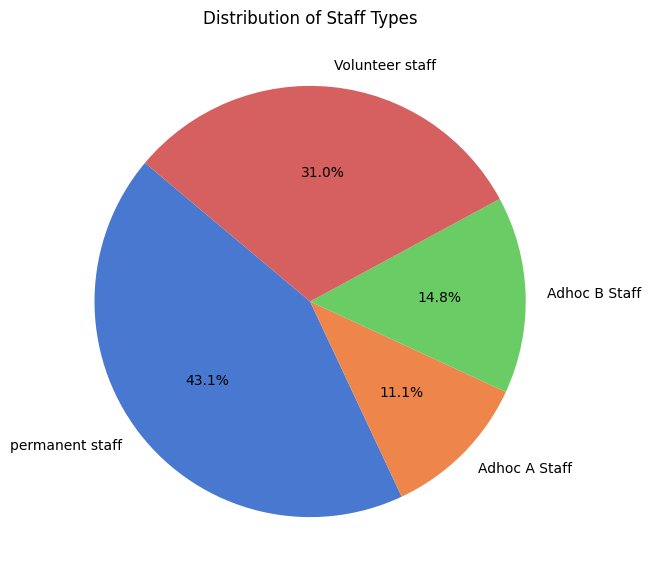

In [ ]:
labels = ['permanent staff', 'Adhoc A Staff', 'Adhoc B Staff', 'Volunteer staff']
sizes = [no_perm_staffs, no_adhoc_A_staffs, no_adhoc_B_staffs,no_vol_staffs ]
  # Blue and Red (or any Seaborn-like colors)

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title("Distribution of Staff Types")
plt.show()

# **Distribution of Health workers by Gender**

In [ ]:
total_male = df['hrh.healt_workers.number_health_workers_male'].sum()
total_female = df['hrh.healt_workers.number_health_workers_female'].sum()

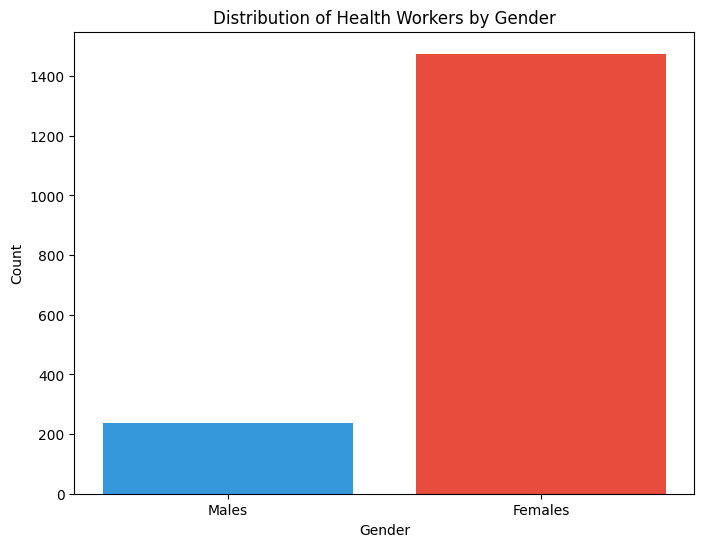

In [ ]:
categories = ['Males', 'Females']
values = [total_male, total_female]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['#3498db', '#e74c3c'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Health Workers by Gender')
plt.show()

# **Comparison of Facility Staff and Health Workers**

In [ ]:
health_workers_permanent = df['hrh.healt_workers.number_health_workers_permanent'].sum()
health_workers_adhoc_a = df['hrh.healt_workers.number_health_workers_adhoc_a'].sum()
health_workers_adhoc_b = df['hrh.healt_workers.number_health_workers_adhoc_b'].sum()
health_workers_volunteer = int(df['hrh.healt_workers.number_health_workers_volunteer'].sum())

In [ ]:

# Organize data into a DataFrame for Seaborn
data = {
    "Category": ["Permanent", "Adhoc A", "Adhoc B", "Volunteer"],
    "Facility Staffs": [no_perm_staffs, no_adhoc_A_staffs, no_adhoc_B_staffs, no_vol_staffs],
    "Health Workers": [health_workers_permanent, health_workers_adhoc_a, health_workers_adhoc_b, health_workers_volunteer]
}

df_plot = pd.DataFrame(data)

# Melt DataFrame for Seaborn's grouped bar chart
df_melted = pd.melt(df_plot, id_vars="Category",
                    var_name="Staff Type", value_name="Count")

#
# Plot using Plotly Express
fig = px.bar(df_melted,
             x="Category",
             y="Count",
             color="Staff Type",
             barmode="group",
             title="Comparison of Facility Staff and Health Workers")

# Show the figure
fig.show()

# **Count of Facilities by LGA**

In [ ]:
fac_local =  df['facility_details.lga'].value_counts()

In [ ]:
df_fac_local =  pd.DataFrame(fac_local)
df_fac_local.reset_index(inplace=True)
df_fac_local.columns = ['LGA','count']

In [ ]:
# sns.barplot(data=df_fac_local, x=df_fac_local.index, y='count')
# plt.xticks(rotation=45)
# plt.show()

# Plot using Plotly Express
fig = px.bar(df_fac_local,
             x='LGA',
             y="count",
             color='LGA',
            #  barmode="group",
             title="Count of Facilities by LGA")

# Show the figure
fig.show()

# **Comparison of Cadres of Health Workers and Types**

In [ ]:
cadres = [
    "hrh.medical_officers.number_medical_officer_available",
    "hrh.medical_officers.number_permanent_medical_officer_available",
    "hrh.medical_officers.number_adhoc_a_medical_officer_available",
    "hrh.medical_officers.number_adhoc_b_medical_officer_available",
    "hrh.medical_officers.number_volunteer_medical_officer_available",
    "hrh.medical_officers.number_medical_officer_present",
    "hrh.medical_officers.number_permanent_medical_officer_present",
    "hrh.medical_officers.medical_officers_absence_reason",
    "hrh.medical_officers.medical_officers_absence_main_reason",
    "hrh.nurses_midwives.number_nurses_midwives_available",
    "hrh.nurses_midwives.number_permanent_nurses_midwives_available",
    "hrh.nurses_midwives.number_adhoc_a_nurses_midwives_available",
    "hrh.nurses_midwives.number_adhoc_b_nurses_midwives_available",
    "hrh.nurses_midwives.number_volunteer_nurses_midwives_available",
    "hrh.nurses_midwives.number_nurses_midwives_present",
    "hrh.nurses_midwives.number_permanent_nurses_midwives_present",
    "hrh.nurses_midwives.nurses_midwives_absence_reason",
    "hrh.nurses_midwives.nurses_midwives_absence_main_reason",
    "hrh.cho.number_cho_available",
    "hrh.cho.number_permanent_cho_available",
    "hrh.cho.number_adhoc_a_cho_available",
    "hrh.cho.number_adhoc_b_cho_available",
    "hrh.cho.number_volunteer_cho_available",
    "hrh.cho.number_cho_present",
    "hrh.cho.number_permanent_cho_present",
    "hrh.cho.cho_absence_reason",
    "hrh.cho.cho_absence_main_reason",
    "hrh.schew.number_schew_available",
    "hrh.schew.number_permanent_schew_available",
    "hrh.schew.number_adhoc_a_schew_available",
    "hrh.schew.number_adhoc_b_schew_available",
    "hrh.schew.number_volunteer_schew_available",
    "hrh.schew.number_schew_present",
    "hrh.schew.number_permanent_schew_present",
    "hrh.schew.schew_absence_reason",
    "hrh.schew.schew_absence_main_reason",
    "hrh.jchew.number_jchew_available",
    "hrh.jchew.number_permanent_jchew_available",
    "hrh.jchew.number_adhoc_a_jchew_available",
    "hrh.jchew.number_adhoc_b_jchew_available",
    "hrh.jchew.number_volunteer_jchew_available",
    "hrh.jchew.number_jchew_present",
    "hrh.jchew.number_permanent_jchew_present",
    "hrh.jchew.jchew_absence_reason",
    "hrh.jchew.jchew_absence_main_reason",
    "hrh.medical_lab_technician.number_mlt_available",
    "hrh.medical_lab_technician.number_permanent_mlt_available",
    "hrh.medical_lab_technician.number_adhoc_a_mlt_available",
    "hrh.medical_lab_technician.number_adhoc_b_mlt_available",
    "hrh.medical_lab_technician.number_volunteer_mlt_available",
    "hrh.medical_lab_technician.number_mlt_present",
    "hrh.medical_lab_technician.number_permanent_mlt_present",
    "hrh.medical_lab_technician.mlt_absence_reason",
    "hrh.medical_lab_technician.mlt_absence_main_reason",
    "hrh.medical_record_officer.number_medical_record_officer_available",
    "hrh.medical_record_officer.number_permanent_medical_record_officer_available",
    "hrh.medical_record_officer.number_adhoc_a_medical_record_officer_available",
    "hrh.medical_record_officer.number_adhoc_b_medical_record_officer_available",
    "hrh.medical_record_officer.number_volunteer_medical_record_officer_available",
    "hrh.medical_record_officer.number_medical_record_officer_present",
    "hrh.medical_record_officer.number_permanent_medical_record_officer_present",
    "hrh.medical_record_officer.medical_record_officer_absence_reason",
    "hrh.medical_record_officer.medical_record_officer_absence_main_reason",
    "hrh.pharmacy_technicians.number_pharmacy_technicians_available",
    "hrh.pharmacy_technicians.number_permanent_pharmacy_technicians_available",
    "hrh.pharmacy_technicians.number_adhoc_a_pharmacy_technicians_available",
    "hrh.pharmacy_technicians.number_adhoc_b_pharmacy_technicians_available",
    "hrh.pharmacy_technicians.number_volunteer_pharmacy_technicians_available",
    "hrh.pharmacy_technicians.number_pharmacy_technicians_present",
    "hrh.pharmacy_technicians.number_permanent_pharmacy_technicians_present",
    "hrh.pharmacy_technicians.pharmacy_technicians_absence_reason",
    "hrh.pharmacy_technicians.pharmacy_technicians_absence_main_reason",
    "hrh.environmental_officer.environmental_officer_availability",
    "hrh.environmental_officer.number_environmental_officer_available",
    "hrh.environmental_officer.number_permanent_environmental_officer_available",
    "hrh.environmental_officer.number_adhoc_a_environmental_officer_available",
    "hrh.environmental_officer.number_adhoc_b_environmental_officer_available",
    "hrh.environmental_officer.number_volunteer_environmental_officer_available",
    "hrh.environmental_officer.number_environmental_officer_present",
    "hrh.environmental_officer.number_permanent_environmental_officer_present",
    "hrh.environmental_officer.environmental_officer_absence_reason",
    "hrh.environmental_officer.environmental_officer_absence_main_reason"
]


In [ ]:
filtered = [col for col in cadres if col.endswith(("available"))]

In [ ]:
cadres = df[filtered]

In [ ]:
cadres.drop(columns=['hrh.medical_officers.number_medical_officer_available','hrh.nurses_midwives.number_nurses_midwives_available', 'hrh.cho.number_cho_available',
                     'hrh.schew.number_schew_available','hrh.jchew.number_jchew_available','hrh.medical_lab_technician.number_mlt_available','hrh.medical_record_officer.number_medical_record_officer_available',
                     'hrh.pharmacy_technicians.number_pharmacy_technicians_available','hrh.environmental_officer.number_environmental_officer_available',], axis=1, inplace=True)

<ipython-input-34-e8d91a930edf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cadres.fillna(0, inplace=True)

<ipython-input-35-35804ce92f21>:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-35-35804ce92f21>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cadre_count = {'cadre': ['medical_officer', 'nurses_midwives', 'cho', 'schew', 'jchew', 'mlt', 'medical_record', 'pharmacy_technicians', 'environmental'],
        'permanent':[0, 0, 0, 0, 0, 0, 0, 0, 0],
        'adhoc_a': [0, 0, 0, 0, 0, 0, 0, 0, 0],
        'adhoc_b': [0, 0, 0, 0, 0, 0, 0, 0, 0],
        'volunteer': [0, 0, 0, 0, 0, 0, 0, 0, 0]}
df_cadre_count =  pd.DataFrame(df_cadre_count)

In [ ]:
df_cadre_count.set_index('cadre', inplace=True)

In [ ]:
df_cadre_count

,permanent,adhoc_a,adhoc_b,volunteer
cadre,,,,
medical_officer,0,0,0,0
nurses_midwives,0,0,0,0
cho,0,0,0,0
schew,0,0,0,0
jchew,0,0,0,0
mlt,0,0,0,0
medical_record,0,0,0,0
pharmacy_technicians,0,0,0,0
environmental,0,0,0,0


In [ ]:

cat_list = ['medical_officer', 'nurses_midwives', 'cho', 'schew', 'jchew', 'mlt', 'medical_record', 'pharmacy_technicians', 'environmental']
type_cat = ['permanent',	'adhoc_a',	'adhoc_b',	'volunteer']
for col in cadres.columns:
    for cat in cat_list:
      if cat in col:
        for i in type_cat:
          if i in col:
              df_cadre_count.loc[cat, i] += cadres[col].sum()


In [ ]:
df_cadre_count

,permanent,adhoc_a,adhoc_b,volunteer
cadre,,,,
medical_officer,0,5,0,0
nurses_midwives,177,14,8,28
cho,81,0,0,3
schew,383,20,144,250
jchew,65,9,8,78
mlt,146,3,11,57
medical_record,82,8,1,49
pharmacy_technicians,42,4,12,23
environmental,119,17,12,51


In [ ]:
df_cadre_count.reset_index(inplace=True)

In [ ]:
# Melt DataFrame for Seaborn's grouped bar chart
df_melted_cat = pd.melt(df_cadre_count, id_vars="cadre",
                    var_name="Cadre Type", value_name="Count")

#
# Plot using Plotly Express
fig = px.bar(df_melted_cat,
             x="cadre",
             y="Count",
             color="Cadre Type",
             barmode="group",
             title="Comparison of Cadres of Health Workers and Types")

# Show the figure
fig.show()

# **Comparison of Available and Present Health Workers**

In [ ]:
avab_dict = {'cardr': ['medical_officer', 'nurses_midwives', 'cho', 'schew', 'jchew', 'mlt', 'medical_record', 'pharmacy_technicians', 'environmental'],
        'available':[0, 0, 0, 0, 0, 0, 0, 0, 0],
        'present': [0, 0, 0, 0, 0, 0, 0, 0, 0],}
df_avab =  pd.DataFrame(avab_dict)


In [ ]:
df_avab.set_index('cardr', inplace=True)

In [ ]:
absent_available_subset = df[ [
    "hrh.medical_officers.number_medical_officer_available",
    "hrh.medical_officers.number_medical_officer_present",
    "hrh.nurses_midwives.number_nurses_midwives_available",
    "hrh.nurses_midwives.number_nurses_midwives_present",
    "hrh.cho.number_cho_available",
    "hrh.cho.number_cho_present",
    "hrh.schew.number_schew_available",
    "hrh.schew.number_schew_present",
    "hrh.jchew.number_jchew_available",
    "hrh.jchew.number_jchew_present",
    "hrh.medical_lab_technician.number_mlt_available",
    "hrh.medical_lab_technician.number_mlt_present",
     "hrh.medical_record_officer.number_medical_record_officer_available",
    "hrh.medical_record_officer.number_medical_record_officer_present",
    "hrh.pharmacy_technicians.number_pharmacy_technicians_available",
    "hrh.pharmacy_technicians.number_pharmacy_technicians_present",
    "hrh.environmental_officer.number_environmental_officer_available",
    "hrh.environmental_officer.number_environmental_officer_present",
    ]]

In [ ]:
absent_available_subset.fillna(0, inplace=True)

<ipython-input-46-020d4beb6939>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cat_lis = ['medical_officer', 'nurses_midwives', 'cho', 'schew', 'jchew', 'mlt', 'medical_record', 'pharmacy_technicians', 'environmental']
type_ca = ['available',	'present']
for col in absent_available_subset.columns:
    for cat in cat_lis:
      if cat in col:
        for i in type_ca:
          if i in col:
              df_avab.loc[cat, i] += absent_available_subset[col].sum()

In [ ]:
df_avab.reset_index(inplace=True)

In [ ]:
# Melt DataFrame for Seaborn's grouped bar chart
df_melted_avab = pd.melt(df_avab, id_vars="cardr",
                    var_name="Cadre Type", value_name="Count")

#
# Plot using Plotly Express
fig = px.bar(df_melted_avab,
             x="cardr",
             y="Count",
             color="Cadre Type",
             barmode="group",
             title="Comparison of Available and Present Health Workers")

# Show the figure
fig.show()

# **Count of facilities and Types of referral Types**

In [ ]:
refereal = df['facility_details.referral_type'].value_counts()
referal_df = pd.DataFrame(refereal)
referal_df.reset_index(inplace=True)
referal_df.columns = ['Referral Type','count']

In [ ]:
fig = px.bar(referal_df,
             x='Referral Type',
             y="count",
             color='Referral Type',
            #  barmode="group",
             title="Count of facilities and Types of referral Types")

# Show the figure
fig.show()

# **Top five Reasons for Absenteesm**

In [ ]:
absense = df[['hrh.schew.schew_absence_main_reason']].value_counts()
absense_df = pd.DataFrame(absense)

In [ ]:
subset_absence = absense_df.iloc[0: 5]
subset_absence.reset_index(inplace=True)
subset_absence.columns = ['Main reason Absenteesm', 'count']

In [ ]:
fig = px.bar(subset_absence,
             x='Main reason Absenteesm',
             y="count",
             color='Main reason Absenteesm',
            #  barmode="group",
             title="Top five Reasons for Absenteesm")

# Show the figure
fig.show()

# **Name of Facilities that stock vaccine**

In [ ]:
# Name of Facility that stock vaccine
specific_facilities_vaccine = df.loc[df['supply_chain.vaccines.vaccines_available'] == 'yes', 'facility_details.facility']
specific_facilities_vaccine

,facility_details.facility
0,phc_kasuwan_mata
1,hc_tashan_yari
2,phc_danguzuri
4,phc_gimi_gari
5,phc_gazara
10,phc_gubuchi
11,phc_makarfi
14,phc_gwanki
21,hc_bakutaje
30,phc_kinkimau


# **Name of the facilities with functional refrigerator**

In [ ]:
# Name of the facility with functional refrigerator
specific_facilities_reg = df.loc[df['facility_details.refrigerators_functionality'] == 'yes', 'facility_details.facility']
specific_facilities_reg

,facility_details.facility
5,phc_gazara
14,phc_gwanki
30,phc_kinkimau
34,phc_television
37,phc_kubau_road
38,phc_kabala_west
42,hc_bagado
44,phc_kakuri_gwari
45,phc_makera
47,phc_kakuri_hausa


In [ ]:
# Most dispensed vaccine the previuos visit
dispense_vaccine = df['supply_chain.vaccine_dispense.dispensed_vaccines_this_week'].value_counts().idxmax()

print(dispense_vaccine)

penta opv pcv


In [ ]:
# Why the above vaccine most dispensed
why = df[['supply_chain.vaccine_dispense.Why_opv_most_dispensed',
   'supply_chain.vaccine_dispense.why_penta_most_dispensed',
   'supply_chain.vaccine_dispense.Why_pcv_most_dispensed']]
filtered_columns_na = why.dropna(how='all')
filtered_columns = filtered_columns_na.value_counts().idxmax()
print(list(filtered_columns))

['routine_vaccine_schedules', 'routine_vaccine_schedules', 'routine_vaccine_schedules']


In [ ]:
from google.colab import auth
from gspread_dataframe import set_with_dataframe

auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
spreadsheet = gc.open('Longitudinal_assessment_baseline')


In [ ]:
worksheet = spreadsheet.worksheet('Data_dumb')

In [ ]:
set_with_dataframe(worksheet, df)

# **Summary of Key Findings**
1. Kaduna South has the highest number of facilities operating 24/7 and Makarfi has the lowest number of facilities operating around the clock
2. Permanent staff and volunteer staff are the predominant groups within facilities
3. There is a significant gender imbalance in the healthcare sector, with females forming the majority of health workers
4. Our findings indicates a variation in the number of facilities across the different LGAs, with Makarfi having the highest concentration and Kaduna North having the lowest.
5. Our findings indicates that secondary type of referral are the most prevalent, followed by primary type of referral, and tertiary type of referal facilities are the least common.
6. Our findings indicates that shift-related reasons are the most common cause of absenteeism, followed by personal health issues and leave.
7. We found out that the most dispensed vaccines are Penta, OPV and PCV are the most dispensed vaccines reason been routine vaccine schedules.
8. 30 facilities have functional refrigerators and 50 stock vaccines in the facility.

# Recommendations Based on Findings

1. Addressing 24/7 Facility Distribution:

Increase the number of 24/7 facilities in Makarfi and other LGAs with low availability to improve access to healthcare services, especially in emergencies.

2. Balancing Staff Composition:

Promote gender diversity in the healthcare workforce by implementing recruitment strategies that encourage male participation.

3. Improving Facility Distribution:

Consider redistributing resources or establishing additional facilities in Kaduna North and other under-served LGAs to balance healthcare access.

4. Enhancing Referral Systems:

Strengthen the infrastructure and capacity of primary and tertiary referral facilities to create a balanced referral network.

5. Tackling Absenteeism:

Implement flexible shift systems to address shift-related absenteeism while ensuring service continuity.

6. Optimizing Vaccine Distribution:

Ensure the consistent supply of Penta, OPV, and PCV vaccines, given their high demand due to routine schedules.

7. Strengthening Cold Chain and Storage:

Increase the number of functional refrigerators across facilities to enhance vaccine storage capacity.
Provide regular maintenance and training for cold chain management to prevent vaccine spoilage.

8. Continuous Monitoring and Evaluation:

Establish a regular monitoring system to track healthcare facility performance and identify areas requiring improvement.


These recommendations aim to address gaps in service delivery, optimize resource allocation, and improve healthcare outcomes across Kaduna State. Let me know if you'd like to refine or expand these suggestions!